# ARIMA 3 - SARIMA, ARIMAX, SARIMAX
- Revisão
- Treinar identificação de AR e MA
- Modelos incompletos
- Modelos Sazonais (SARIMA)
- Introdução: Utilizando variáveis exógenas
- CCF


In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from funcoes import all_ac, plot_forecast, teste_estacionariedade, diagnostico, compara_previsoes
plt.rcParams["figure.figsize"] = [12, 5]

## Último modelo que fizemos

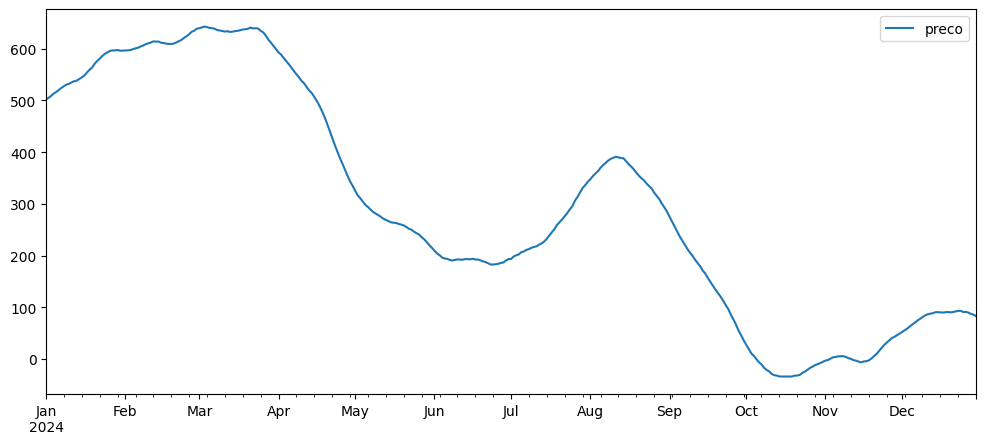

In [ ]:
Y = pd.read_csv('../../dados/ARIMA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods = 365)
Y.plot()
plt.show()

In [4]:
teste_estacionariedade(Y)

('Não Estacionário', 'Não Estacionário')

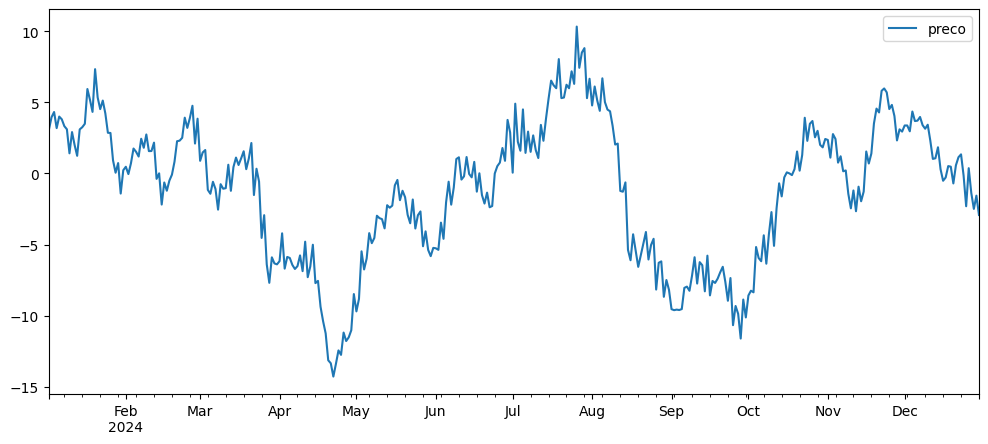

('Estacionário', 'Estacionário')

In [5]:
primeira_ordem = Y.diff().dropna()
primeira_ordem.plot()
plt.show()
teste_estacionariedade(primeira_ordem)

                               SARIMAX Results                                
Dep. Variable:                  preco   No. Observations:                  365
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -514.589
Date:                Tue, 11 Mar 2025   AIC                           1041.178
Time:                        10:34:56   BIC                           1064.561
Sample:                    01-01-2024   HQIC                          1050.472
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5211      0.053      9.863      0.000       0.418       0.625
ar.L2          0.4295      0.054      7.886      0.000       0.323       0.536
ma.L1         -0.0321      0.025     -1.286      0.1

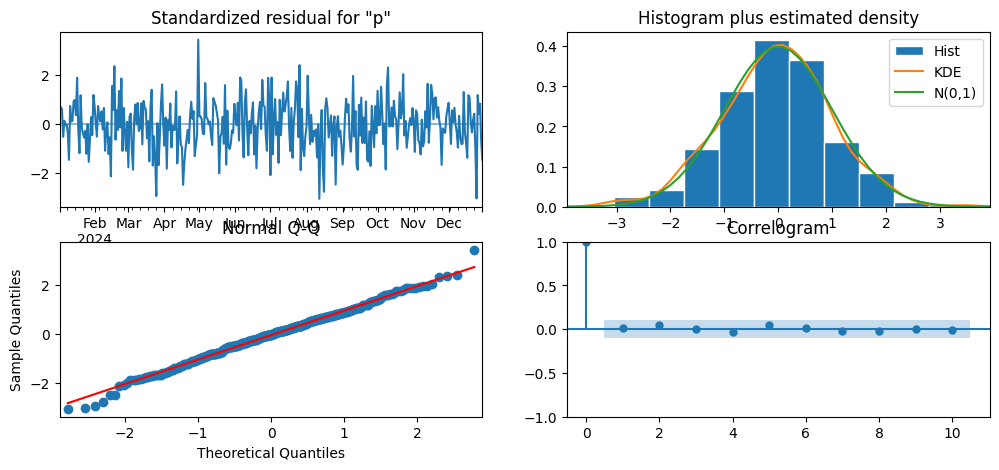

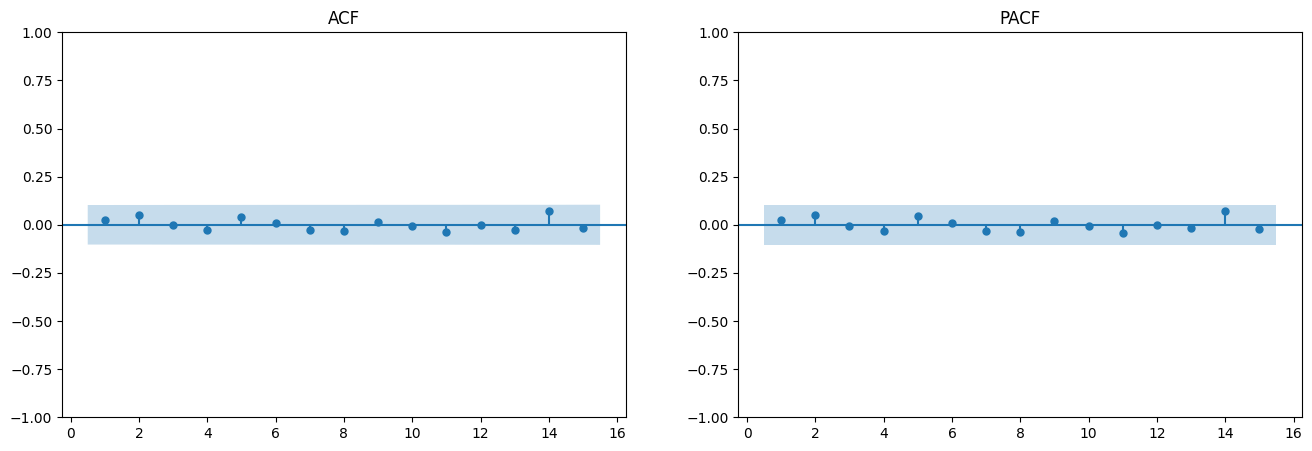

In [6]:
model = ARIMA(Y, order=(2, 1, 3)).fit()
diagnostico(model)

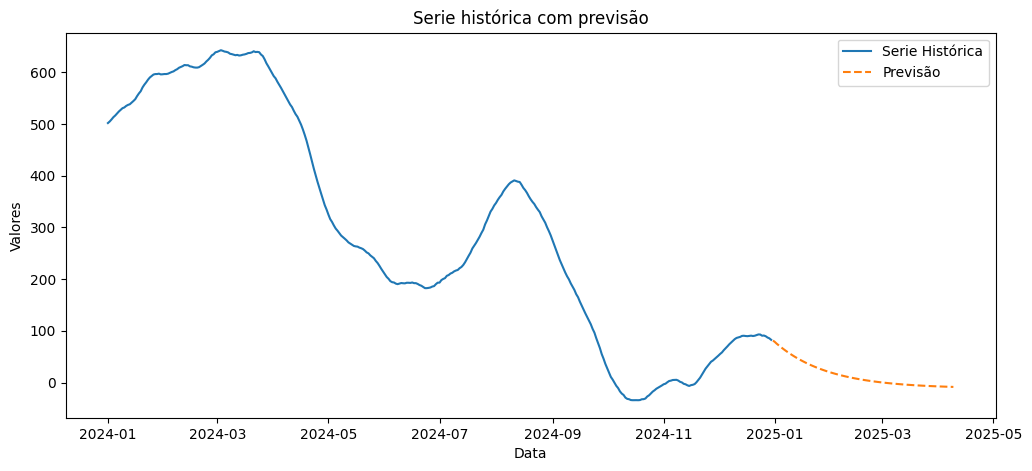

In [7]:
previsao = model.forecast(100)
plot_forecast(Y,previsao)

## Modelos incompletos

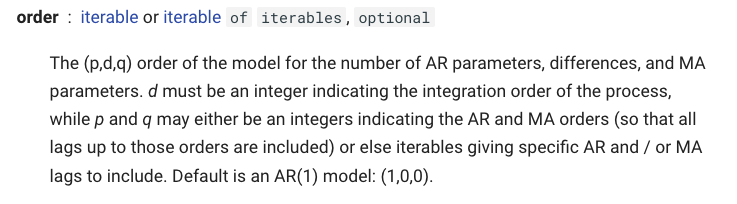

                               SARIMAX Results                                
Dep. Variable:                  preco   No. Observations:                  365
Model:               ARIMA(2, 1, [3])   Log Likelihood                -515.275
Date:                Tue, 11 Mar 2025   AIC                           1038.549
Time:                        10:34:57   BIC                           1054.138
Sample:                    01-01-2024   HQIC                          1044.745
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4931      0.047     10.540      0.000       0.401       0.585
ar.L2          0.4567      0.048      9.528      0.000       0.363       0.551
ma.L3          0.9217      0.023     39.346      0.0

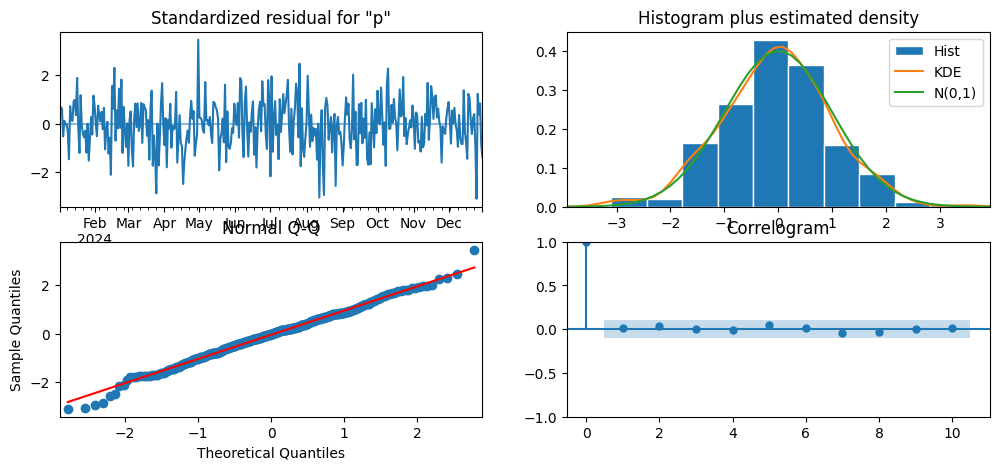

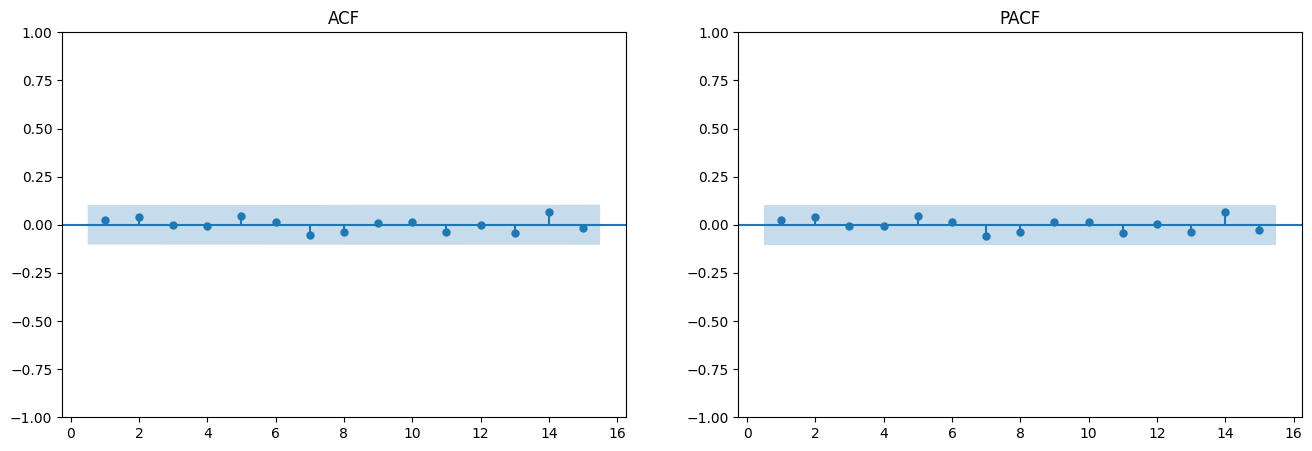

In [8]:
model = ARIMA(Y, order=(2, 1, (0,0,1))).fit()
diagnostico(model)

Reparem que o BIC e o AIC estão menores

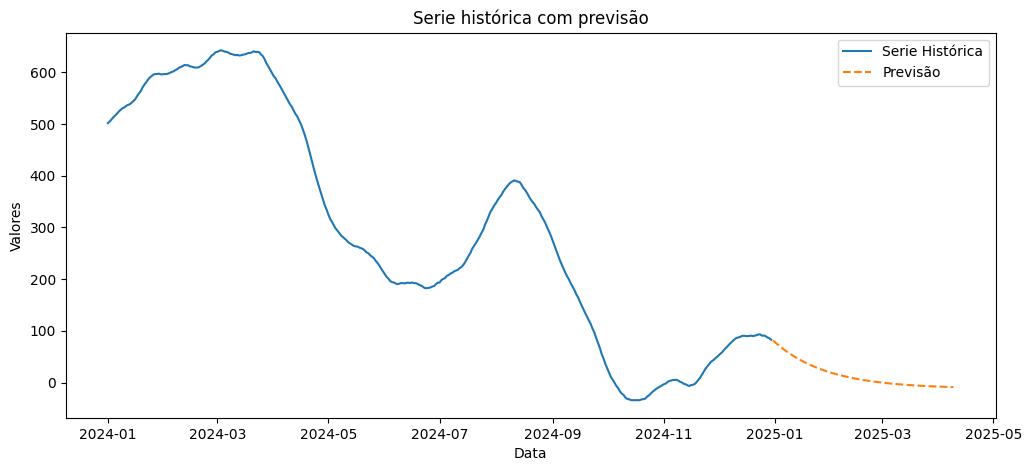

In [9]:
previsao = model.forecast(100)
plot_forecast(Y,previsao)

ARIMA(2,1,(0,0,1))
$$ \large (1 - B) Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \theta_3 \epsilon_{t-3} + \epsilon_t $$

$$ \large (1 - B) Y_t = 0.493 Y_{t-1} + 0.457 Y_{t-2} + 0.922 \epsilon_{t-3} + \epsilon_t $$

In [10]:
model.params

ar.L1     0.493122
ar.L2     0.456669
ma.L3     0.921652
sigma2    0.969362
dtype: float64

## Treinando identificação de séries

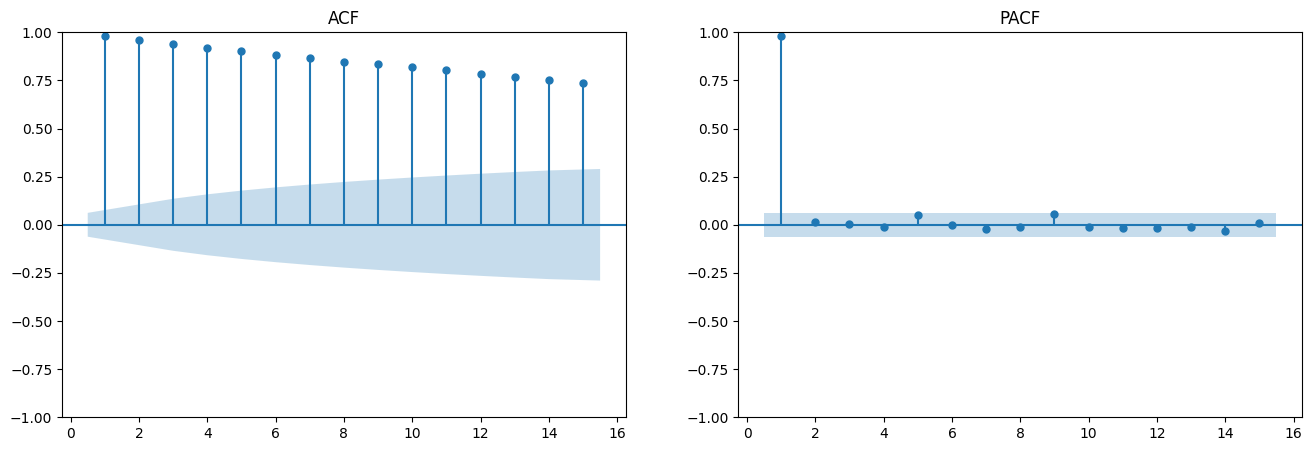

In [11]:
import geracao_de_series as gc
from funcoes import all_ac
np.random.seed(42)
Y = pd.Series(gc.generate_ar_series([0.98], n_samples=1000))
all_ac(Y)

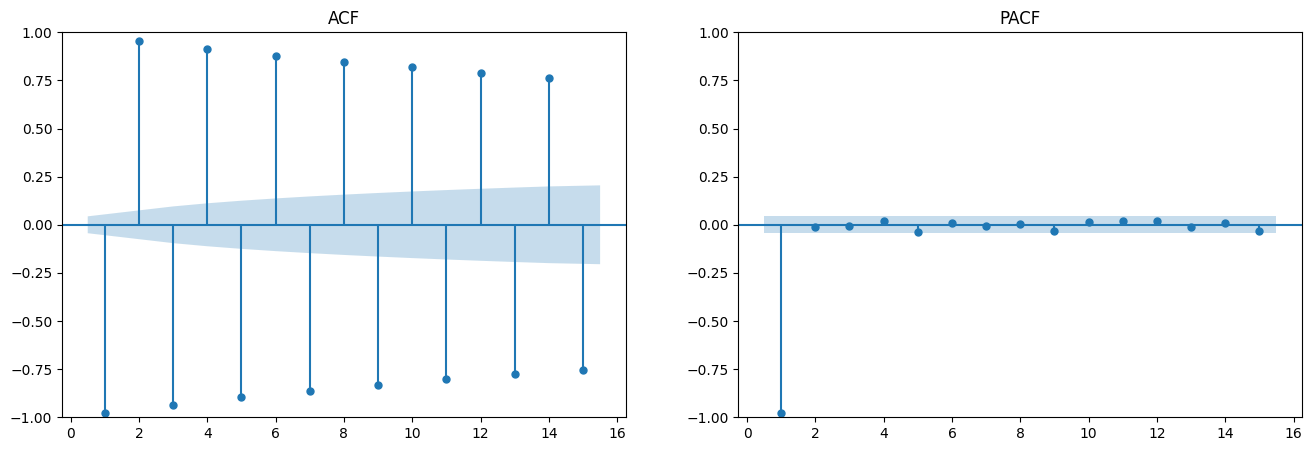

In [12]:
np.random.seed(42)
Y = pd.Series(gc.generate_ar_series([-0.98]))
all_ac(Y)

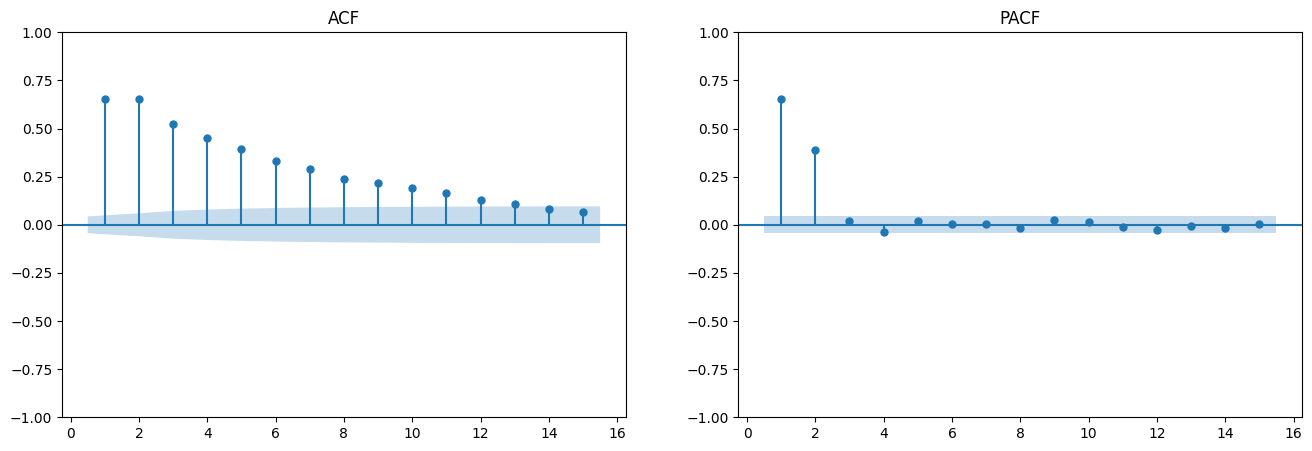

In [13]:
np.random.seed(42)
Y = pd.Series(gc.generate_ar_series([0.4, 0.4]))
all_ac(Y)

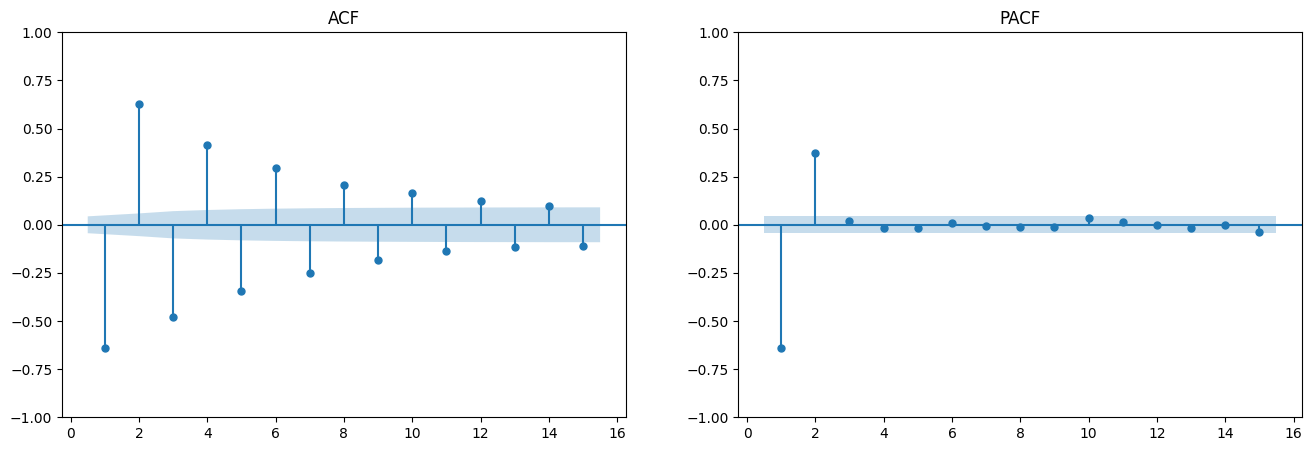

In [14]:
np.random.seed(42)
Y = pd.Series(gc.generate_ar_series([-0.4, 0.4]))
all_ac(Y)

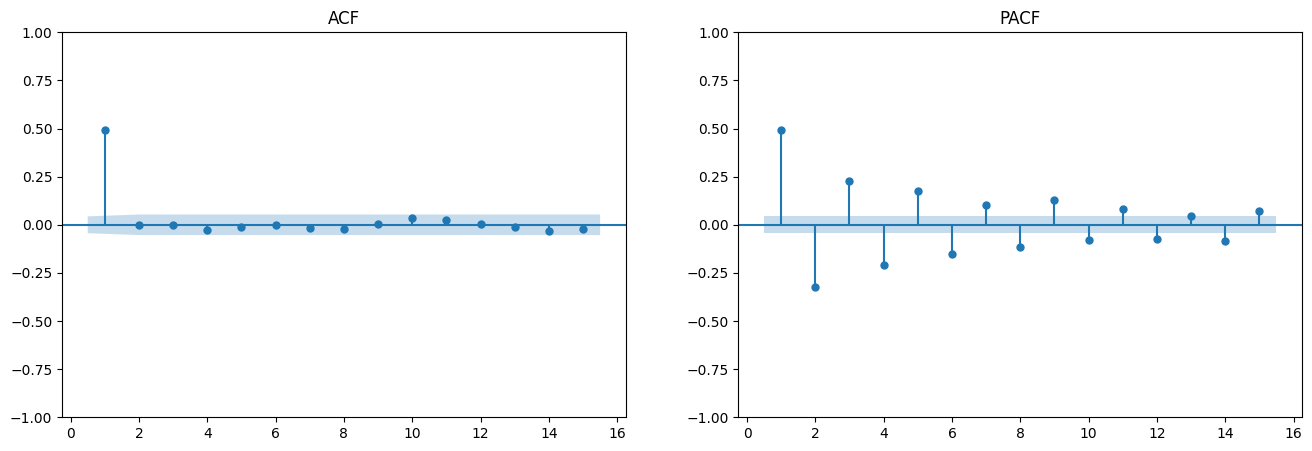

In [15]:
np.random.seed(42)
Y = pd.Series(gc.generate_ma_series([0.98]))
all_ac(Y)

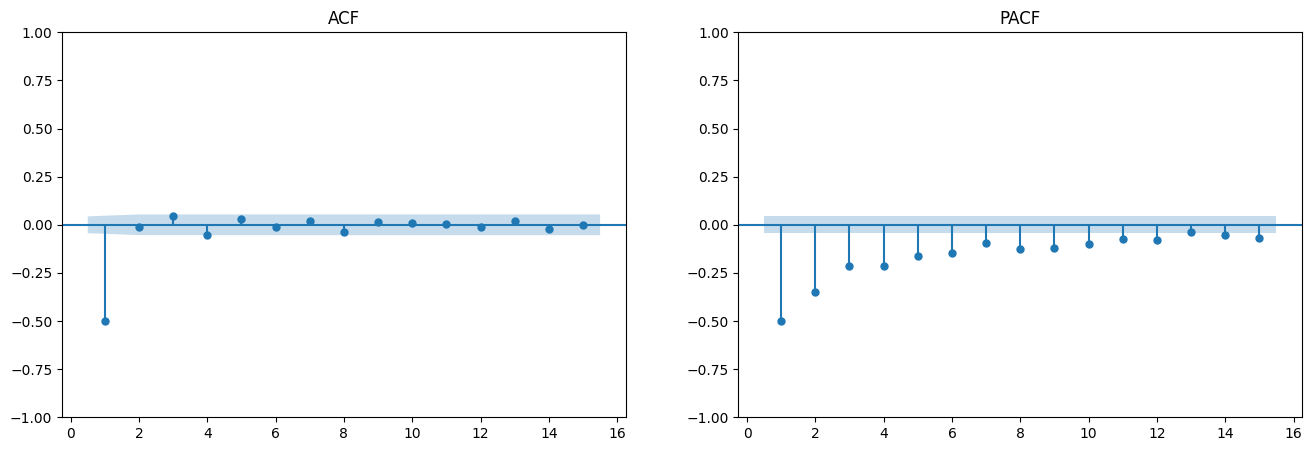

In [16]:
np.random.seed(42)
Y = pd.Series(gc.generate_ma_series([-0.98]))
all_ac(Y)

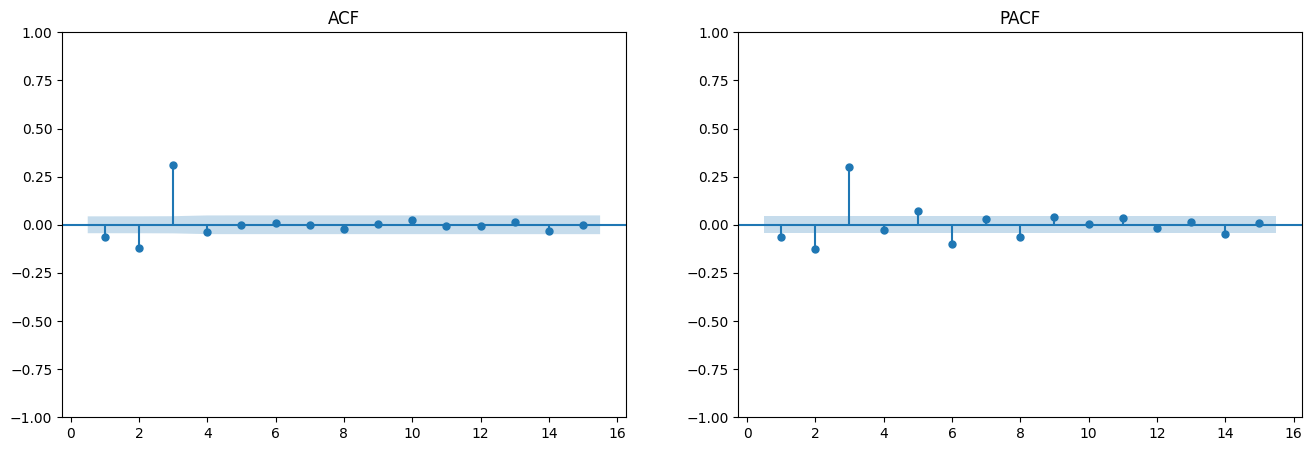

In [17]:
np.random.seed(42)
Y = pd.Series(gc.generate_ma_series([-0.4, -0,3]))
all_ac(Y)

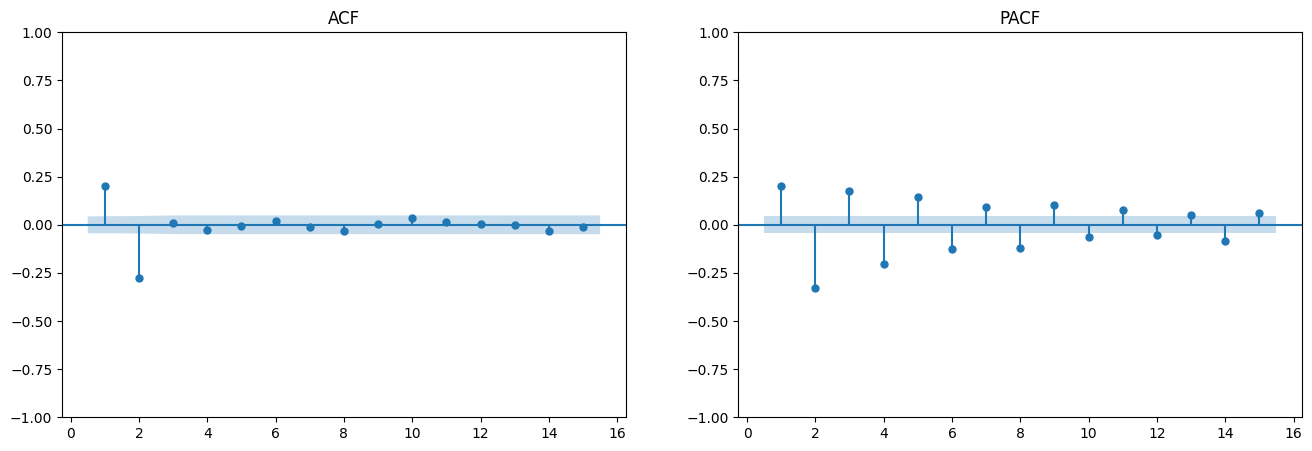

In [18]:
np.random.seed(42)
Y = pd.Series(gc.generate_ma_series([0.5,-0.4]))
all_ac(Y)

## SARIMA
nessa parte vamos tentar aplicar modelos para séries sazonais usando as ferramentas que temos em mão:

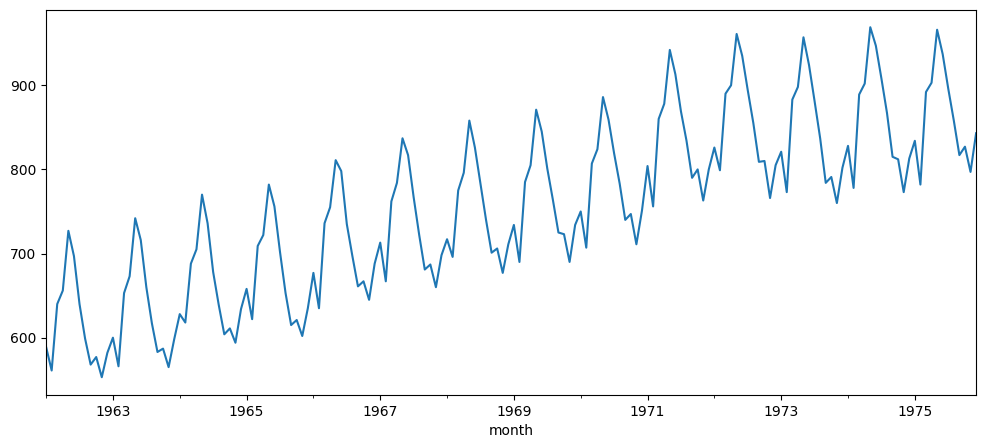

In [ ]:
milk = pd.read_csv('../../dados/milk_production.csv')
milk.index = pd.to_datetime(milk['month'])
milk.index.freq = 'MS'
milk_prod = pd.Series(milk['production'], name="produção de leite")
milk_prod.plot()
plt.show()

In [20]:
teste_estacionariedade(milk_prod)

('Não Estacionário', 'Não Estacionário')

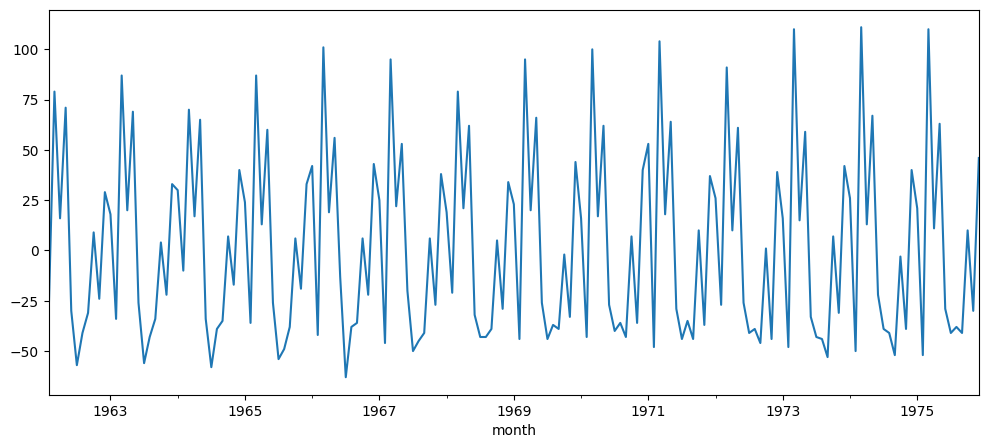

('Estacionário', 'Estacionário')

In [21]:
primeira_ordem = milk_prod.diff().dropna()
primeira_ordem.plot()
plt.show()
teste_estacionariedade(primeira_ordem)

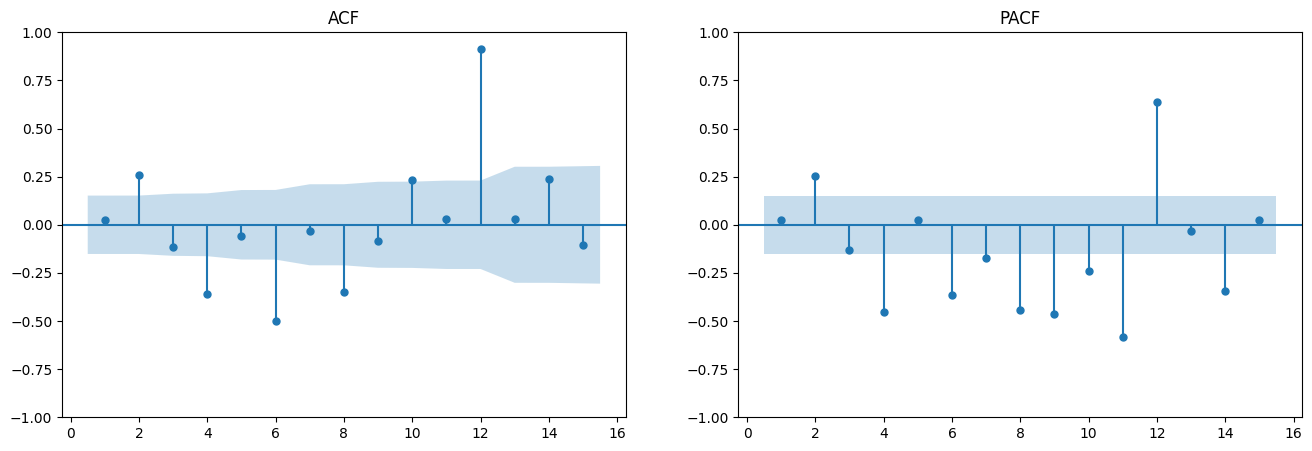

In [22]:
all_ac(primeira_ordem)

Models MA aparentam ser uma boa solução.

                               SARIMAX Results                                
Dep. Variable:      produção de leite   No. Observations:                  168
Model:               ARIMA(0, 1, [2])   Log Likelihood                -861.689
Date:                Tue, 11 Mar 2025   AIC                           1727.378
Time:                        10:34:58   BIC                           1733.614
Sample:                    01-01-1962   HQIC                          1729.909
                         - 12-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L2          0.4300      0.077      5.557      0.000       0.278       0.582
sigma2      1771.2201    260.113      6.809      0.000    1261.408    2281.032
Ljung-Box (L1) (Q):                   0.39   Jarque-

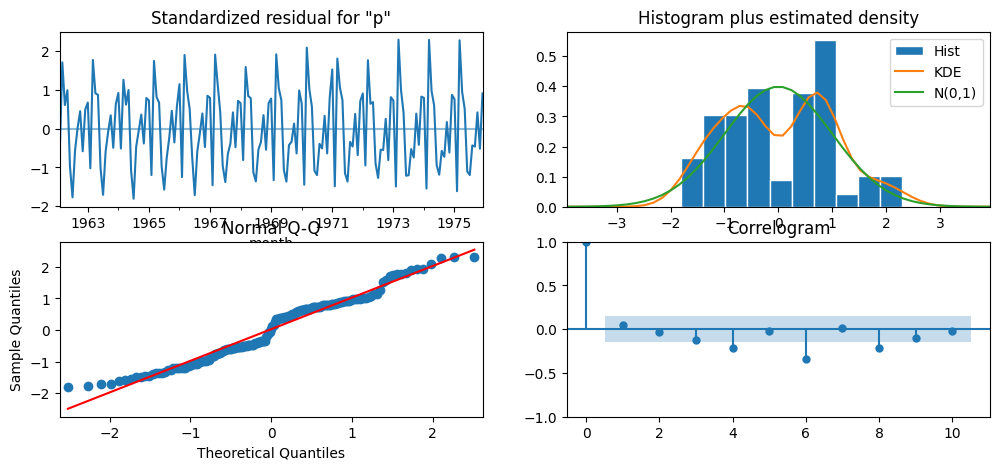

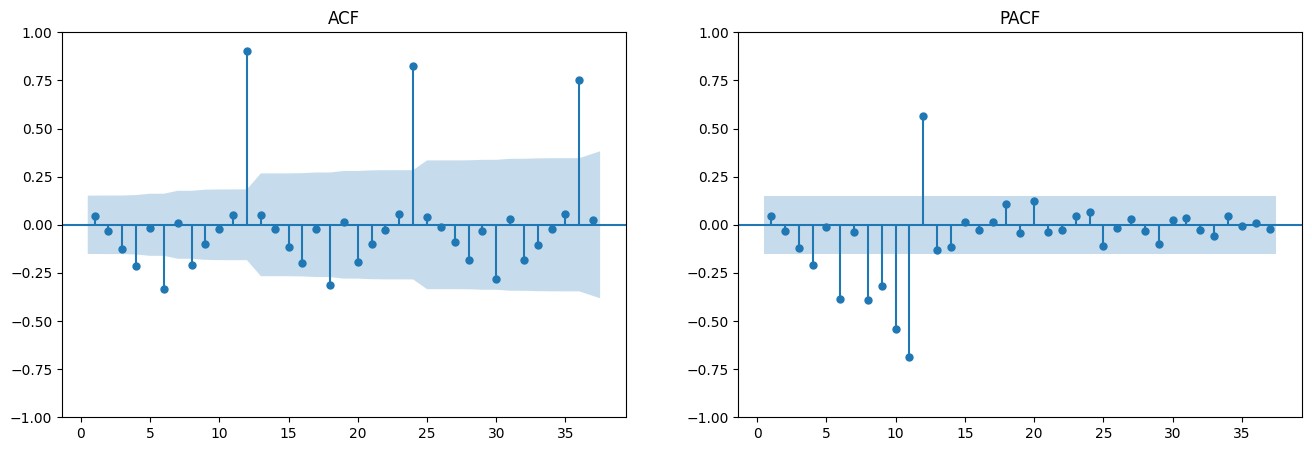

In [23]:
model1 = ARIMA(milk_prod, order = (0,1,(0,1))).fit()
diagnostico(model1, lags=37)

                                SARIMAX Results                                 
Dep. Variable:        produção de leite   No. Observations:                  168
Model:             ARIMA(0, 1, [2, 12])   Log Likelihood                -791.727
Date:                  Tue, 11 Mar 2025   AIC                           1589.455
Time:                          10:34:59   BIC                           1598.809
Sample:                      01-01-1962   HQIC                          1593.252
                           - 12-01-1975                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L2          0.3663      0.083      4.433      0.000       0.204       0.528
ma.L12         0.9648      0.104      9.264      0.000       0.761       1.169
sigma2       578.4446    106.795    

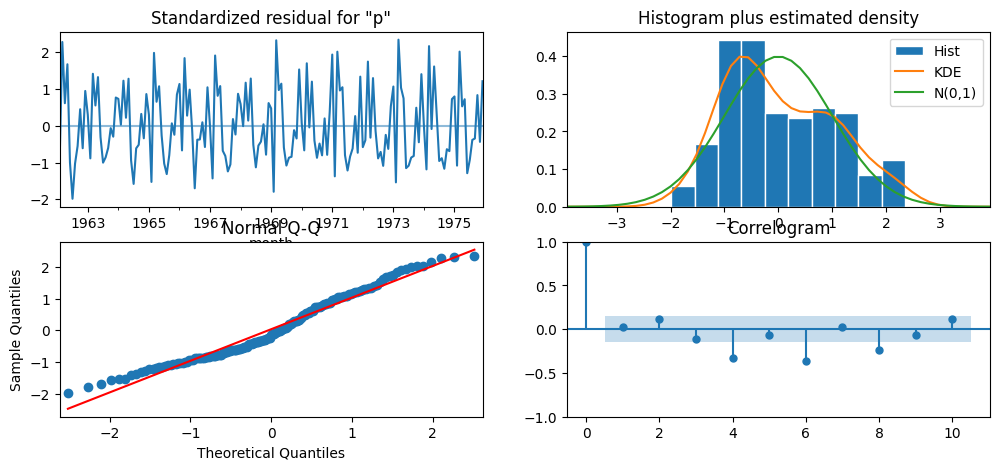

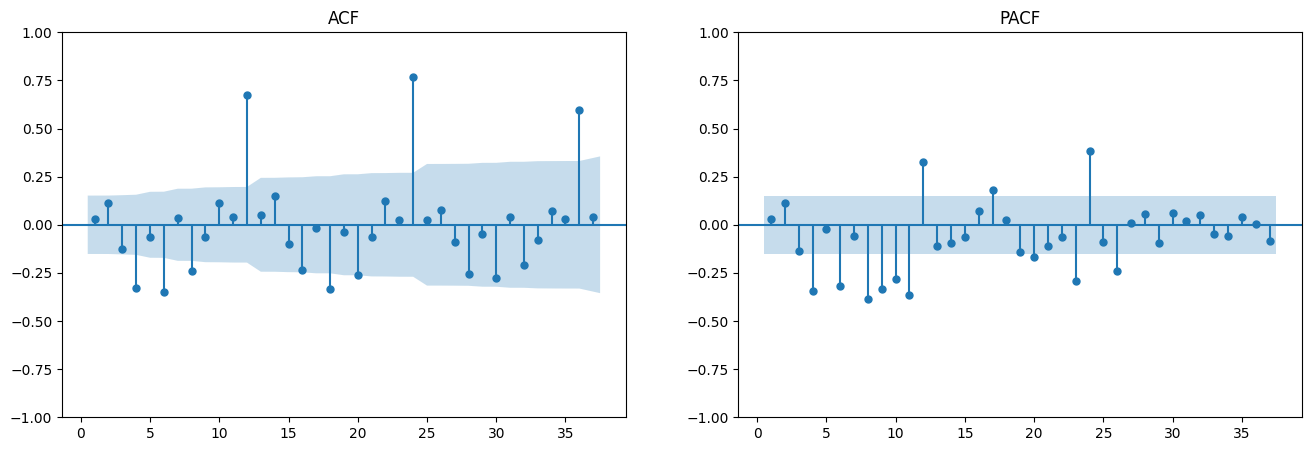

In [24]:
model1 = ARIMA(milk_prod, order = (0,1,(0,1,0,0,0,0,0,0,0,0,0,1)), freq='MS').fit()
diagnostico(model1, lags=37)

/Users/danielferreira/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                SARIMAX Results                                 
Dep. Variable:        produção de leite   No. Observations:                  168
Model:             ARIMA([12], 1, [12])   Log Likelihood                -596.830
Date:                  Tue, 11 Mar 2025   AIC                           1199.660
Time:                          12:34:05   BIC                           1209.014
Sample:                      01-01-1962   HQIC                          1203.456
                           - 12-01-1975                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L12         0.9979      0.002    636.874      0.000       0.995       1.001
ma.L12        -0.6110      0.068     -8.930      0.000      -0.745      -0.477
sigma2        55.5250      5.381    

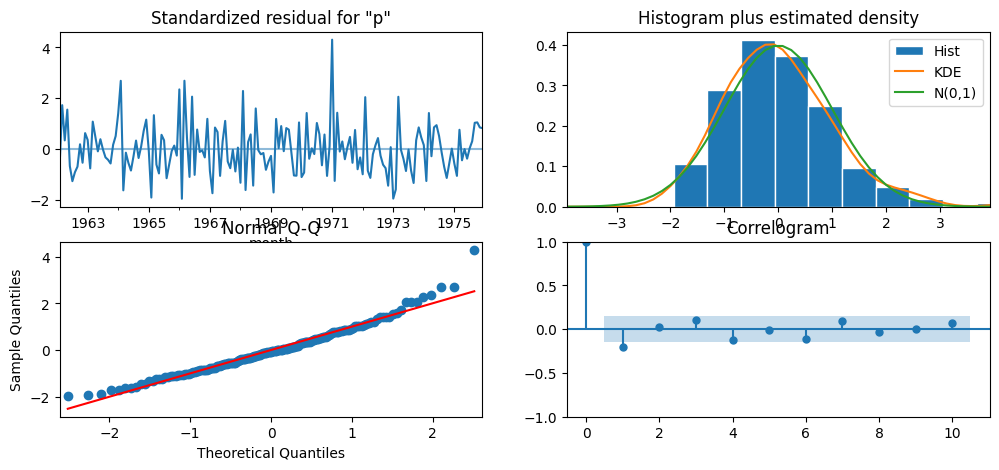

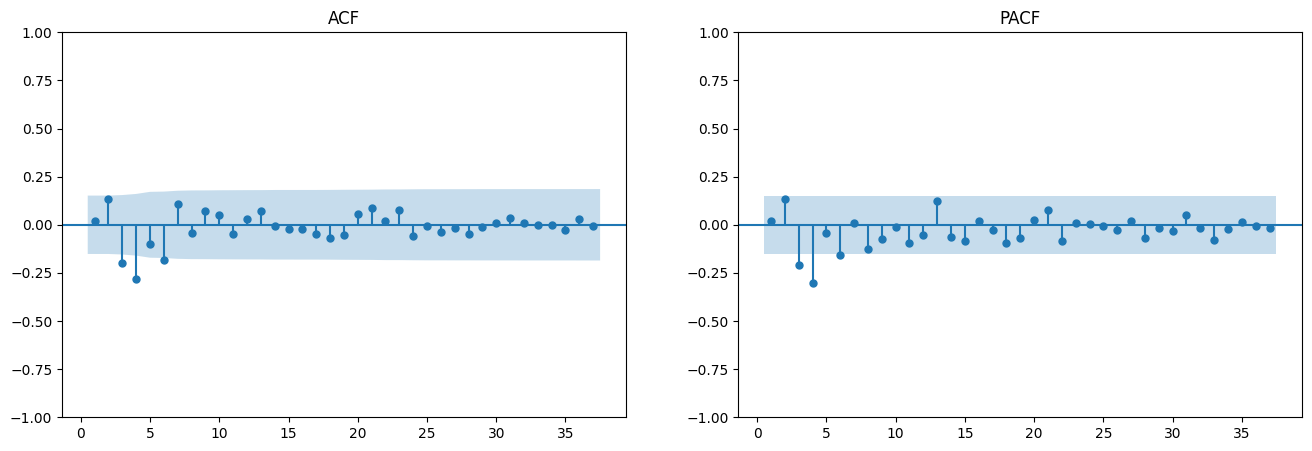

In [53]:
model1 = ARIMA(milk_prod, order = ((0,0,0,0,0,0,0,0,0,0,0,1),1,(0,0,0,0,0,0,0,0,0,0,0,1)), freq='MS').fit()
diagnostico(model1, lags=37)

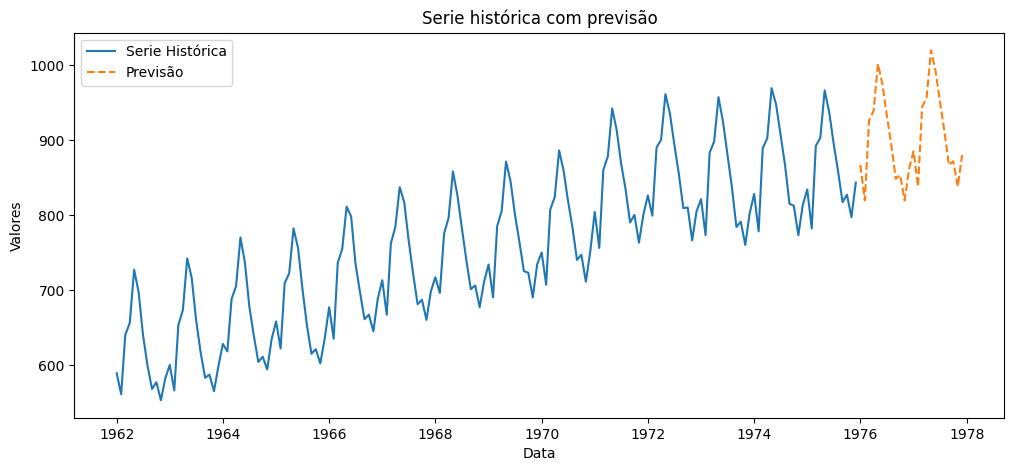

In [54]:
previsao1 = model1.forecast(24)
plot_forecast(milk_prod,previsao1)



$$
\large (1 -  B) Y_t =  \phi_{12} Y_{t-12} + \theta_{12} \epsilon_{t-12} + \epsilon_t
$$

$$
\large (1 -  B) Y_t =  0.9979 Y_{t-12}  -0.6110 \epsilon_{t-12} + \epsilon_t
$$

**Vantagens do SARIMA:**
O modelo SARIMA é uma extensão do ARIMA que inclui componentes sazonais. Ele é útil para séries temporais que exibem padrões sazonais, pois pode capturar essa sazonalidade com menos parâmetros do que seria necessário com múltiplos modelos ARIMA.

**Diferenciação Sazonal:**
A diferenciação sazonal é uma técnica usada para remover a sazonalidade de uma série temporal. Isso é feito subtraindo o valor da série de um período anterior específico (por exemplo, 12 meses atrás para dados mensais). A diferenciação sazonal pode ajudar a tornar a série estacionária, o que é necessário para aplicar modelos ARIMA/SARIMA.


## SARIMA
$$
\large (1 - B)^d (1 - B^s)^D Y_t = c + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \Phi_1 Y_{t-s} + \dots + \Phi_P Y_{t-Ps} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \Theta_1 \epsilon_{t-s} + \dots + \Theta_Q \epsilon_{t-Qs}
$$

### SARIMA (1,0,1)(1,0,1)_12


$$
\large Y_t = c + \phi_1 Y_{t-1} + \Phi_1 Y_{t-12} - \phi_1 \Phi_1 Y_{t-13} + \theta_1 \epsilon_{t-1} + \Theta_1 \epsilon_{t-12} + \theta_1 \Theta_1 \epsilon_{t-13} + \epsilon_t
$$


In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(milk_prod, order = (0,1,1), seasonal_order=(0,1,1,12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18645D+00    |proj g|=  3.19592D-02

At iterate    5    f=  3.15584D+00    |proj g|=  9.62436D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   2.904D-06   3.156D+00
  F =   3.1556438285578245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [77]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  produção de leite   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -530.148
Date:                            Tue, 11 Mar 2025   AIC                           1066.296
Time:                                    12:37:09   BIC                           1075.427
Sample:                                01-01-1962   HQIC                          1070.005
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2204      0.076     -2.898      0.004      -0.369      -0.071
ma.S.L12      -0.6214      0.070     -8.872      0.000      -0.759      -0.484
sigma2        52.7040      4.966     10.613      0.000      42.971      62.437
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                33.65
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.74
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

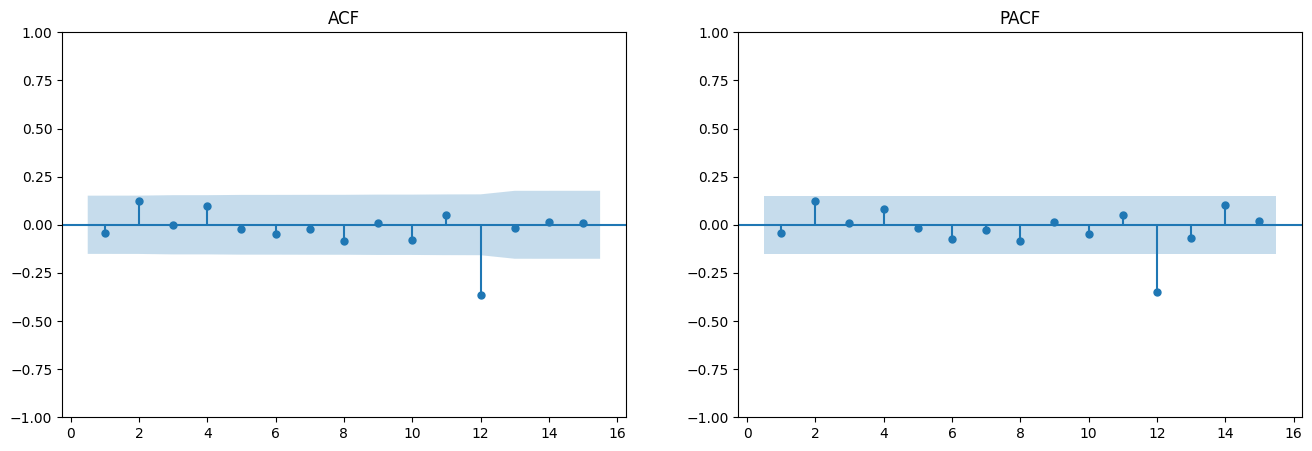

In [78]:
all_ac(model2.resid)

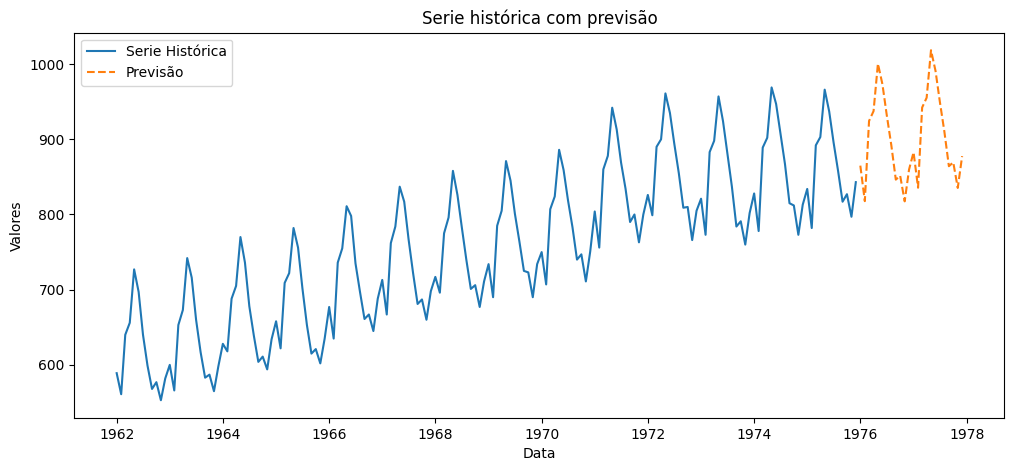

In [79]:
previsao2 = model2.forecast(24)
plot_forecast(milk_prod,previsao2)

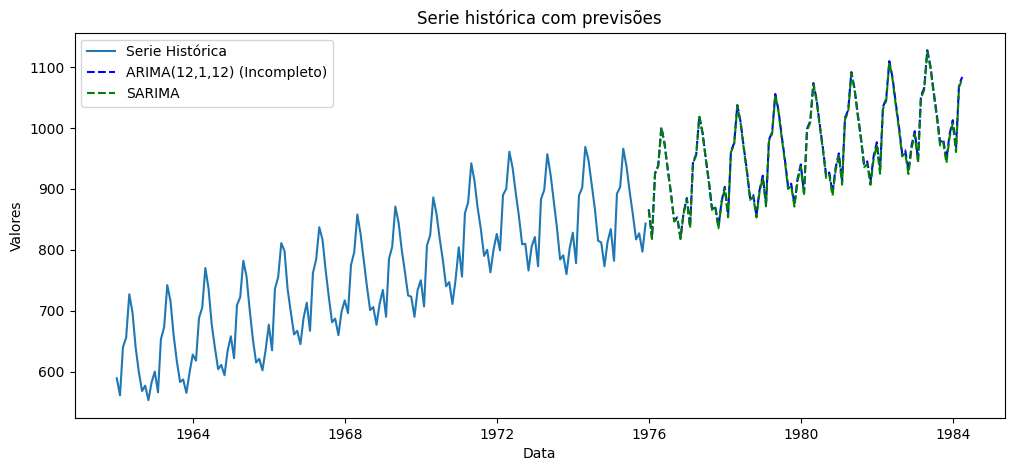

In [80]:
previsao1 = model1.forecast(100)
previsao2 = model2.forecast(100)
compara_previsoes(milk_prod, [previsao1,previsao2], ['ARIMA(12,1,12) (Incompleto)', 'SARIMA'])

Nesse caso, as prevosões do SARIMA e do ARIMA(12,1,12) incompleto estão parecidas, porém alguns casos em que o padrão sazonal é um pouco menos óbvio, o modelo SARIMA tem as suas vantagens. Exemplo:


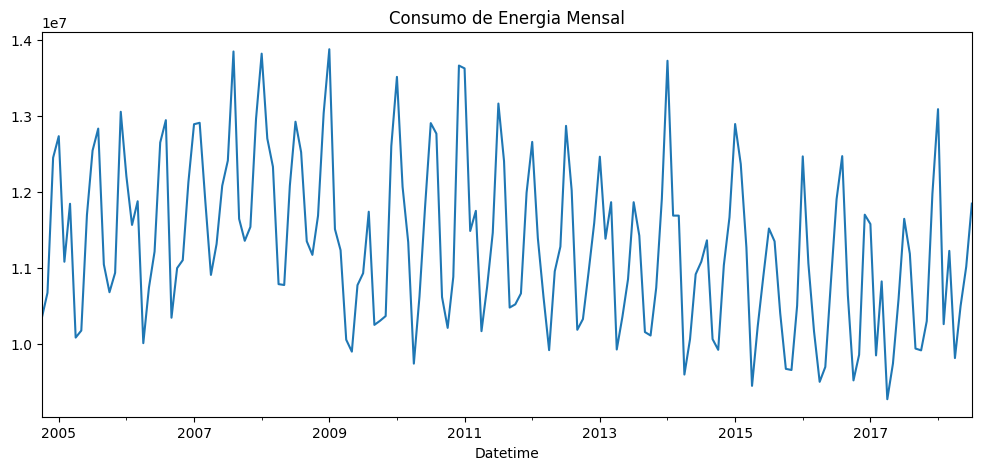

In [ ]:
df = pd.read_csv('../../dados/AEP_hourly.csv')
df = df.set_index(pd.to_datetime(df['Datetime']))
aep = df['AEP_MW'].resample('MS').sum()
aep = aep[:-1]
aep.plot()
plt.title('Consumo de Energia Mensal')
plt.show()

In [33]:
teste_estacionariedade(aep)

('Não Estacionário', 'Não Estacionário')

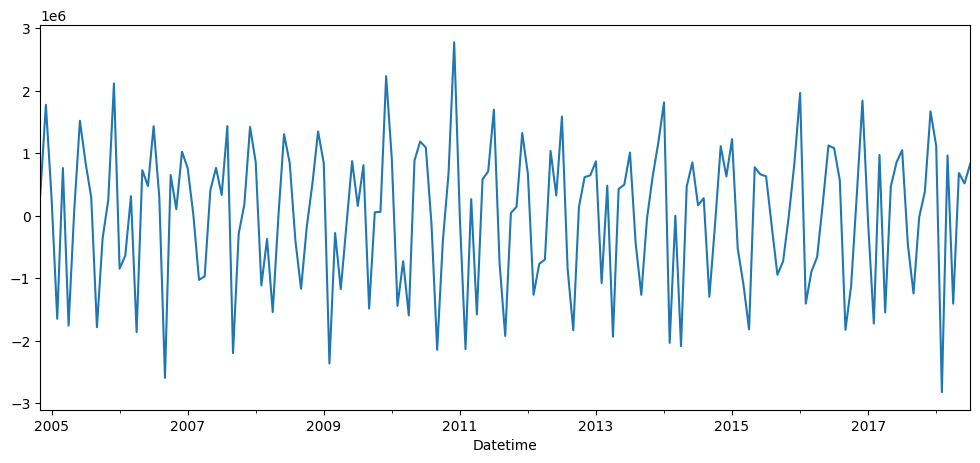

('Estacionário', 'Estacionário')

In [34]:
primeira_ordem = aep.diff().dropna()
primeira_ordem.plot()
plt.show()
teste_estacionariedade(primeira_ordem)

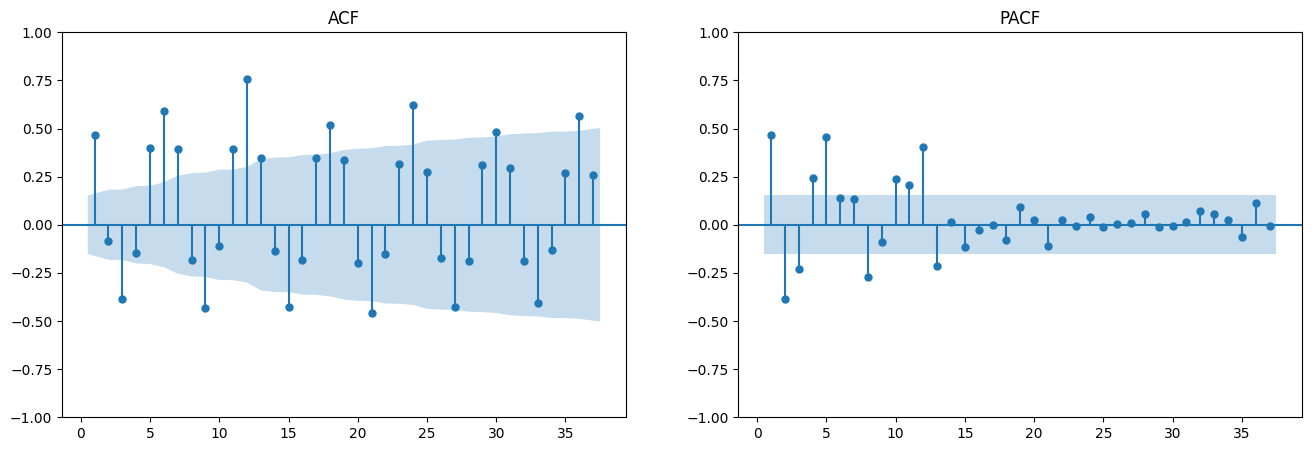

In [35]:
all_ac(aep, lags = 37)

                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:                  166
Model:              ARIMA([12], 1, 0)   Log Likelihood               -2509.994
Date:                Tue, 11 Mar 2025   AIC                           5023.988
Time:                        10:35:00   BIC                           5030.200
Sample:                    10-01-2004   HQIC                          5026.509
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L12         0.5109      0.008     64.515      0.000       0.495       0.526
sigma2      4.722e+11   4.18e-15   1.13e+26      0.000    4.72e+11    4.72e+11
Ljung-Box (L1) (Q):                   0.46   Jarque-

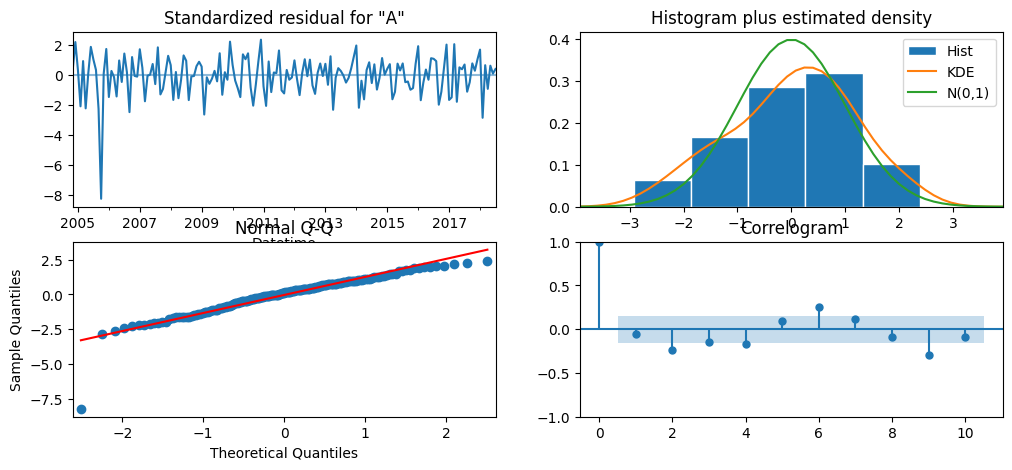

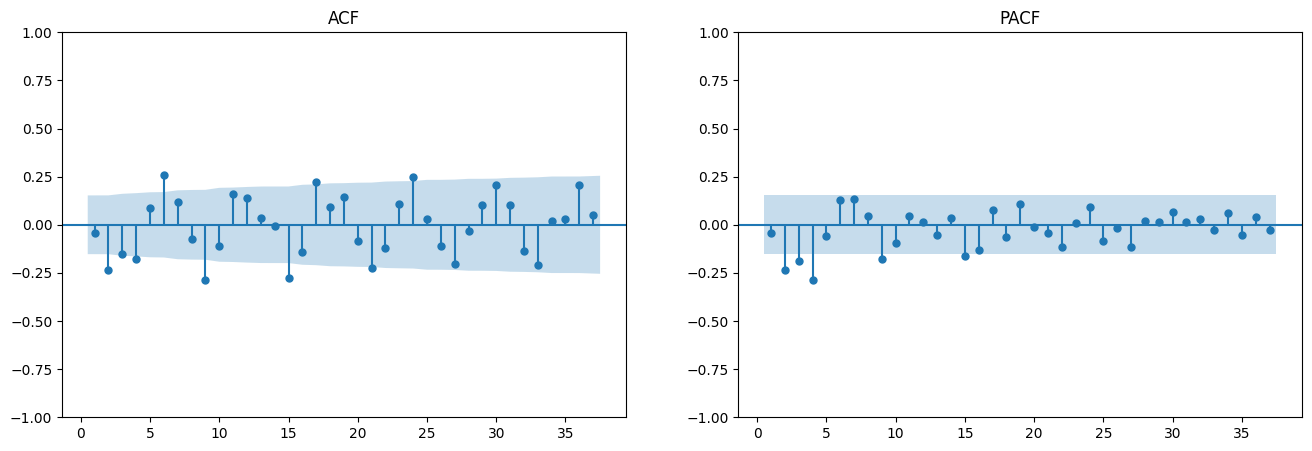

In [36]:
# ARIMA (12,1,1) AR incompleto
model1 = ARIMA(aep, order = ((0,0,0,0,0,0,0,0,0,0,0,1),1,0), freq='MS').fit()
diagnostico(model1, lags=37)

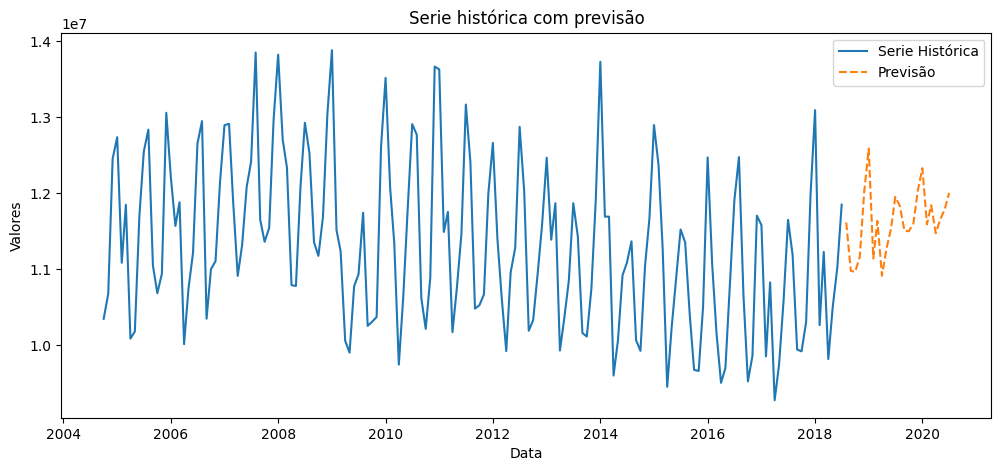

In [37]:
previsao1 = model1.forecast(24)
plot_forecast(aep,previsao1)

Vamos tentar alguns modelos SARIMA:

                                     SARIMAX Results                                      
Dep. Variable:                             AEP_MW   No. Observations:                  166
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -2266.405
Date:                            Tue, 11 Mar 2025   AIC                           4540.810
Time:                                    12:41:24   BIC                           4552.932
Sample:                                10-01-2004   HQIC                          4545.734
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1501      0.027     -5.488      0.000      -0.204      -0.096
ar.L2         -0.1363      0.055   

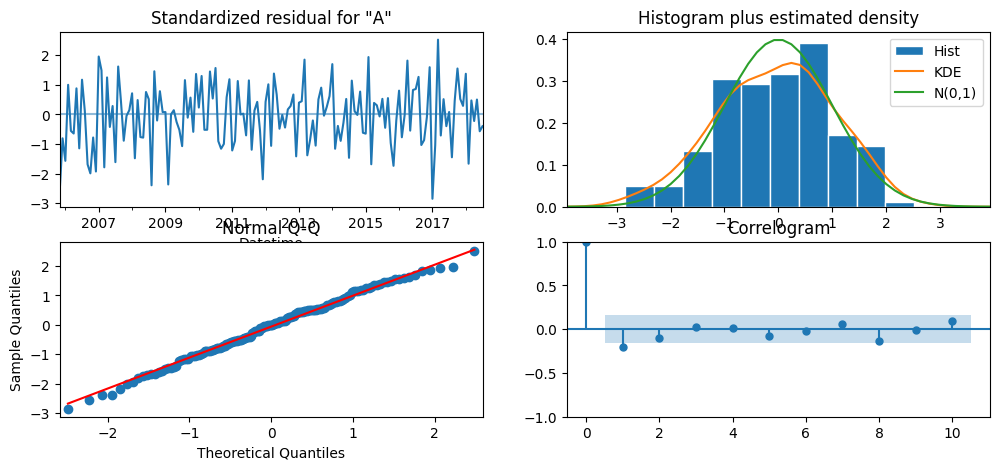

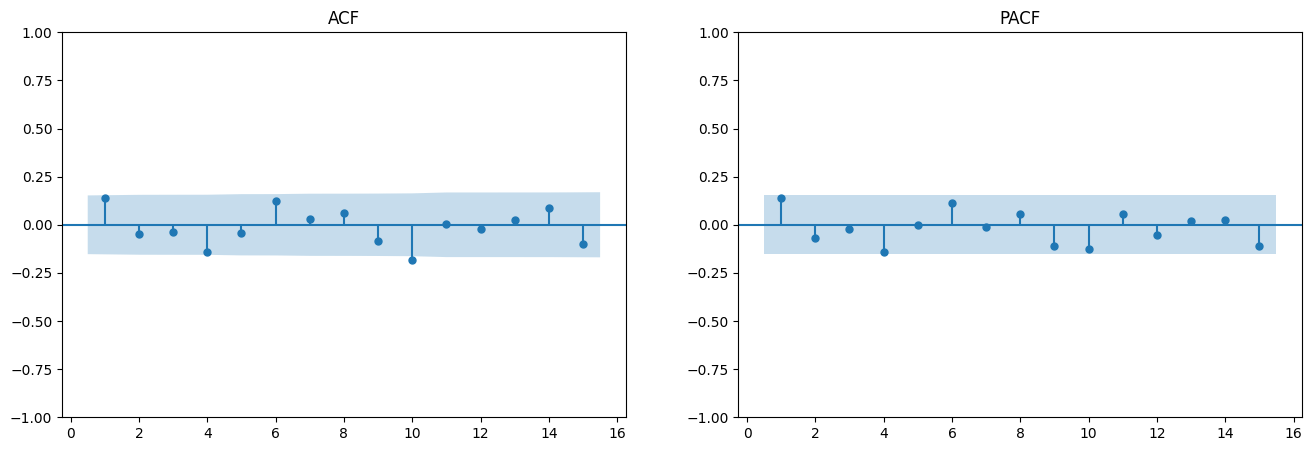

In [82]:
model2 = SARIMAX(aep, order = (2,1,0), seasonal_order=(1,1,0,12)).fit(disp=False)
diagnostico(model2)

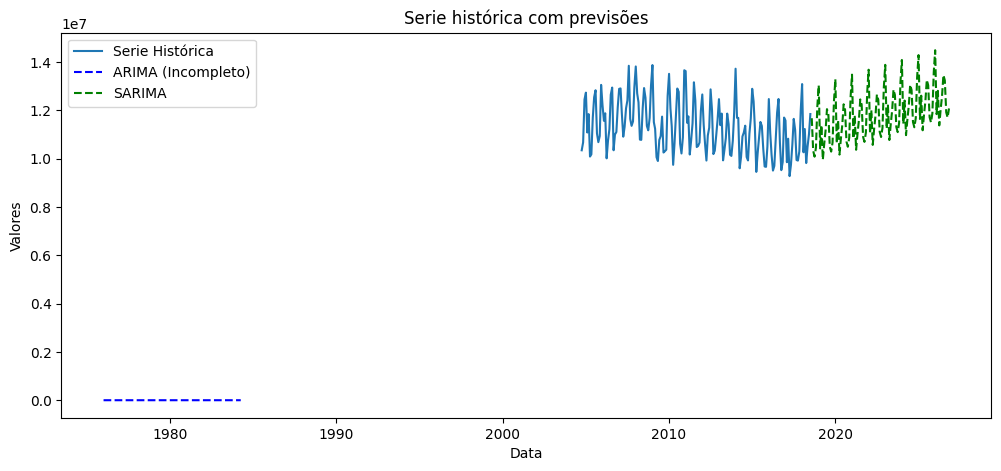

In [84]:
previsao1 = model1.forecast(100)
previsao2 = model2.forecast(100)
compara_previsoes(aep, [previsao1,previsao2], ['ARIMA (Incompleto)','SARIMA'])

Discussão, o que faz essa diferença de previsões? Tip: se tirar a diferencição sazonal as previsões ficam parecidas.


model3 = SARIMAX(aep, order = (1,1,0), seasonal_order=(1,0,0,12)).fit(disp=False)

## Identificação de SARIMAs
Primeira coisa é tirar a tendência e analisar os dados diferenciados.
1) ACF com picos de k em k períodos. Exemplo (de 12 em 12)
2) PACF mostrando pico em k.

Outros gostam de usar o seasonal decompose no ACF



<Axes: xlabel='Datetime'>

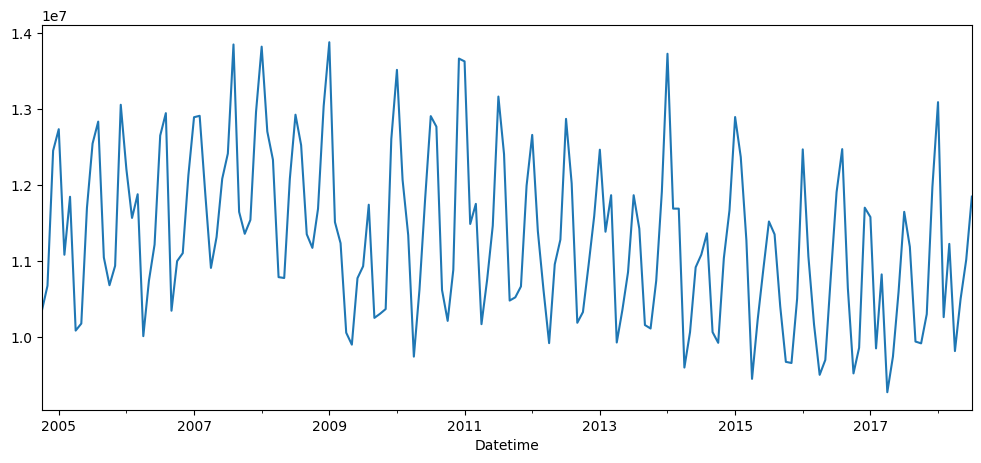

In [40]:
aep.plot()

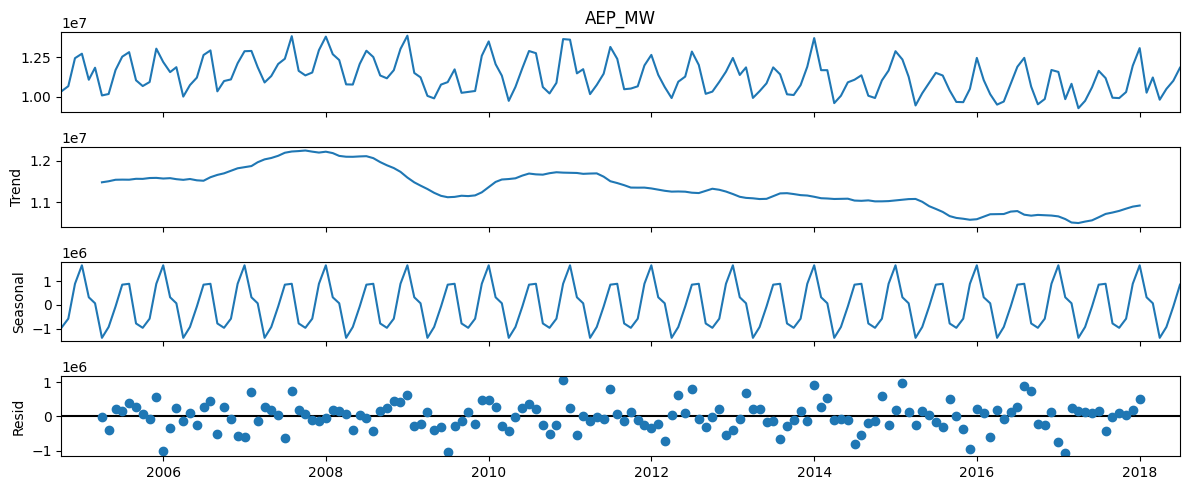

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(aep)
decomp.plot()
plt.show()

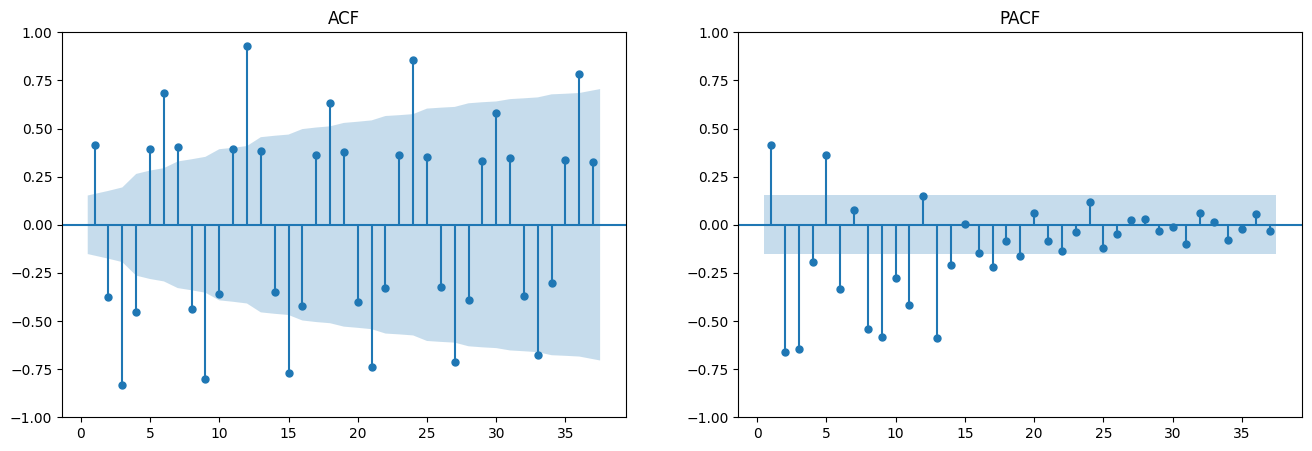

In [42]:
all_ac(decomp.seasonal, lags = 37)

CCF

In [ ]:
df = pd.read_csv('../../dados/clicks_original.csv')

In [44]:
df.index = pd.to_datetime(df['date'])
df = df.drop(['date'], axis=1)
df

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_9482/162579862.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df['date'])


,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784
2008-04-02,43.079056,1,24738
2008-04-03,43.842609,2,15209
2008-04-04,43.312376,1,14018
2008-04-05,43.941176,1,11974
...,...,...,...
2008-08-09,44.182033,1,6716
2008-08-10,43.608260,1,9523
2008-08-11,43.553363,1,8881


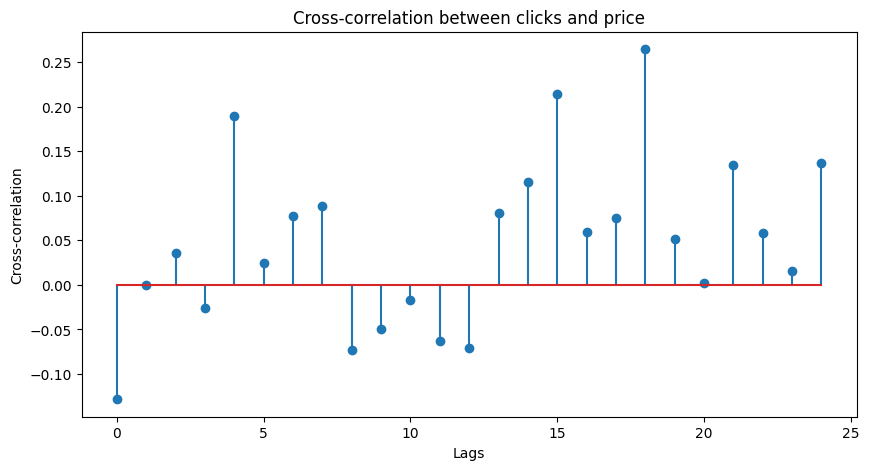

In [45]:
from statsmodels.tsa.stattools import ccf

y = df['clicks']
x = df['price']
cross_corr = ccf(y, x, nlags=25)


lags = np.arange(len(cross_corr))
plt.figure(figsize=(10, 5))
plt.stem(lags, cross_corr)
plt.xlabel('Lags')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between clicks and price')
plt.show()

In [46]:
for l in range(0,10):
    c = y.corr(x.shift(l))
    print(f'lag = {l} - corr = {c}')

lag = 0 - corr = -0.1282308366650658
lag = 1 - corr = -0.0005376367519758416
lag = 2 - corr = 0.03843152390548687
lag = 3 - corr = -0.027825757350709798
lag = 4 - corr = 0.20179614567633508
lag = 5 - corr = 0.025422372009974648
lag = 6 - corr = 0.07980197105818733
lag = 7 - corr = 0.09178263717571376
lag = 8 - corr = -0.08079557412976093
lag = 9 - corr = -0.055670338306004465


Infelizmente o ccf do python não possui opções de calcular para lags futuros, mas podemos fazer na mão:

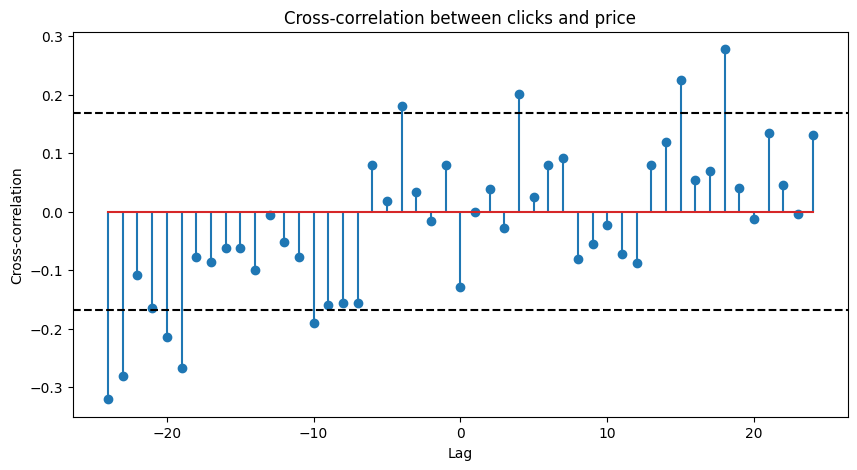

In [47]:
max_lag = 24
correlations = []
lags = range(-max_lag, max_lag + 1)

for l in lags:
    c = y.corr(x.shift(l))
    correlations.append(c)

plt.figure(figsize=(10, 5))
plt.stem(lags, correlations)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between clicks and price')
conf_interval = 1.96 / np.sqrt(len(df))
plt.axhline(-conf_interval, color='k', ls='--')
plt.axhline(conf_interval, color='k', ls='--')
plt.show()